# Lab 2: Modular arithmetic and Diffie-Hellman Key Exchange

In this lab we will be using modular arithmetic, and looking at a particular application (Diffie-Hellman Key Exchange) which is an important part of the foundations of secure communications on the internet.

## 1. Modular arithmetic in Sage

Recall that with modular arithmetic, we work with a finite set of numbers and do arithmetic "modulo" or "mod" a chosen number. For instance working "mod 11", we use the numbers

$$[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]$$

since these are the possible remainders we get when dividing whole numbers by 11. We can do addition and multiplication with these numbers, e.g.:

* $7 + 9 = 16 \equiv 5 \mod 11$,
* $3\times4 = 12 \equiv 1 \mod 11$.

We can use Sage for modular arithmetic:

In [3]:
g = mod(2, 11)

1

This tells Sage to think of $2$ as a number "$\text{mod } 11$" and therefore use modular arithmetic to do calculations with it:

In [2]:
[g^k for k in [1..20]]

[2, 4, 8, 5, 10, 9, 7, 3, 6, 1, 2, 4, 8, 5, 10, 9, 7, 3, 6, 1]

<span class="label label-danger">Task</span> What patterns do you see in this list? Can you explain them?

Notice what happens if instead we _don't_ specify that $2$ should be thought of as a number $\text{mod } 11$:

In [3]:
g = 2
[g^k for k in [1..20]]

[2,
 4,
 8,
 16,
 32,
 64,
 128,
 256,
 512,
 1024,
 2048,
 4096,
 8192,
 16384,
 32768,
 65536,
 131072,
 262144,
 524288,
 1048576]

We can check that in each case, `g` is a different type of object -- it belongs to a different set with different mathematical properties:

In [4]:
g = mod(2, 11)
g.parent()

Ring of integers modulo 11

In [5]:
g = 2
g.parent()

Integer Ring

Notice the word **"ring"**, which will make more sense once you reach Chapter 3 in the lecture notes!

<div class="alert alert-info">
    <h3>Exercise 1.1</h3>

(a) Use Sage to carry out the two example calculations shown at the start of this section.

(b) Find $(11+7)^{10} \mod 13$.
</div>

In [6]:
mod(16,11)

5

In [7]:
mod(12,11)

1

In [8]:
mod((11+7)^10,13)

12

Now we're ready to put modular arithmetic into practice...

## 2. The Diffie-Hellman key exchange protocol

To send secret messages, it can be helpful to first establish a secret that only the sender and receiver know -- for example, when using a [Caesar cipher](https://en.wikipedia.org/wiki/Caesar_cipher) where each letter is shifted by a certain amount, it helps if the sender and receiver know in advance what shift size they will use.

A similar principle is used to help encrypt/decrypt internet traffic, e.g. connections to websites using [TLS](https://en.wikipedia.org/wiki/Transport_Layer_Security), which is often indicated in web browsers with a padlock icon.

The Diffie-Hellman key exchange protocol provides a way for two people (say Alice and Bob) to establish a **shared secret** over an insecure channel where others (say Eve) could see what they are saying to each other.

### Example

To start with, everyone agrees to use the same prime number $p$ and base $g$:

In [9]:
p = 101
g = mod(2, p)

(As an aside, we can use the `%whos` function to check on the values of all variables known to Sage:)

In [10]:
%whos

Variable   Type              Data/Info
--------------------------------------
g          IntegerMod_int    2
k          Integer           20
p          Integer           101


Alice chooses a secret number `a` and then uses this to compute her public key `A`:

In [11]:
a = randint(2, 100) # choose a random integer in [2, 100]
A = g^a
A

99

At this point, we've only printed out `A` and we'll keep `a` secret.

Bob carries out the same procedure, choosing a secret number `b` and computing his public key `B`:

In [12]:
b = randint(2, 100)
B = g^b
B

37

The clever twist is that they can both now work out a **shared secret**, using the public information (`A` and `B`) and the secrets they each hold:

In [13]:
s_A = B^a # Alice knows B and her secret a
s_B = A^b # Bob knows A and his secret b
(s_A, s_B)

(37, 37)

This works because in both cases we are just working out $g^{(ab)}$:

$$ \begin{align} g^{(ab)} &= \left(g^a\right)^b = A^b, \\ g^{(ab)} &= \left(g^b\right)^a = B^a \end{align} $$

<div class="alert alert-info">
    <h3>Exercise 2.1</h3>

Try this with the person next to you!

Work through the following steps together:
</div>

We'll work modulo a slightly bigger prime number:

In [33]:
p = next_prime(10^6)
g = mod(2, p)
(p, g)

(1000003, 2)

Choose your secret number (anything between 1 and `p`):

In [34]:
a = 12

Share your public value with your neighbour:

In [35]:
A = g^a
A

4096

What is your neighbour's public value?

In [36]:
B = g^66
B

402745

So the secret value is:

In [37]:
s = B^a
s

407590

Does this agree with what your neighbour got?

## 3. Snooping on the secret

Is this really secure?

Let's return to the original example:

In [40]:
reset()
p = 101
g = mod(2, p)
a = 5
b = 78
A = g^a
B = g^b
(p, g, A, B)

(101, 2, 32, 21)

Suppose Eve is trying to hack into the communications between Alice and Bob -- she wants to know the value of their shared secret.

Since Eve does not know $a$ or $b$, she has no easy way to work out the secret number $s$. She is forced to try to
work out $a$ or $b$ using the values $A, B, g, p$ but this is not easy. For instance, how can you find $a$ if you know that $$2^a = 25 \mod 101?$$

This is known as the **discrete logarithm problem**, and even the most efficient way for working this out is still not much better than just trying each possible $a$ in turn! When large numbers are being used, this means the time needed to try all the possiblities is impractical.

This code tries each possibility in turn - it will solve the discrete logarithm problem provided $a\leq100$:

In [63]:
i = 1
while i <= 49:
    if mod(2, 50)^i == 2:
        print("a = "+str(i));
        i+=1
    else:
        i = i+1;

a = 1
a = 21
a = 41


In [52]:
i = 1
while i <= 100:
    if mod(2, 101)^i == 32:
        print("a = "+str(i));
        break;
    else:
        i = i+1;

a = 5


In [53]:
i = 1
while i <= 100:
    if mod(2, 101)^i == 21:
        print("b = "+str(i));
        break;
    else:
        i = i+1;

b = 78


<span class="label label-danger">Task</span> Is this the correct solution? Write some code to check!

In [42]:
i = 1
while i <= 100:
    if mod(2, 101)^i == 25:
        print("a = "+str(i));
        break;
    else:
        i = i+1;

32

<div class="alert alert-info">
    <h3>Exercise 3.1</h3>

Adapt the code above to solve the discrete logarithm problem $g^a=A \mod p$ with the values of $g$, $A$ and $p$ from the example above.
</div>

In [22]:
p=101
g = mod(2, p)

i = 1
while i <= 100:
    if g^i == A:
        print("a = "+str(i));
        break;
    else:
        i = i+1;


a = 72


The following function uses this approach to solving the discrete logarithm problem, and returns the solution as well as the time taken:

In [23]:
import time
def time_discrete_log(g, p, A):
    start_time = time.time() # this records the time at the start
    i = 1
    while i <= p-1:
        if mod(g,p)^i == mod(A,p):
            # i is the correct value, so we can stop the loop
            break;
        else:
            i = i+1;
    elapsed_time = time.time() - start_time
    return (i, elapsed_time)

In [24]:
time_discrete_log(g, p, A)

(72, 0.0007441043853759766)

<div class="alert alert-info">
    <h3>Exercise 3.2</h3>

Do you understand what this code is doing? If not, discuss it with your neighbour, or ask one of the tutors!

In particular, why does the `while` loop use the condition `i <= p-1`?
</div>

Note that `time.time()` gives the current time (this is measured in seconds since [1st January 1970](https://en.wikipedia.org/wiki/Unix_time)):

In [25]:
time.time()

1580383222.711236

Let's try with a bigger prime number, to see how much harder the problem gets for Eve:

In [61]:
p = next_prime(10^5)
g = mod(2, p);
a = randint(2, p-1)
A = g^a
E = time_discrete_log(g, p, A)
print("Solving %s^%s = %s mod %s" % (g, "a", A, p))
print("Solution found: a = %s\nTime taken: %s" % E)
E[0] == a

Solving 2^a = 15352 mod 100003
Solution found: a = 71742
Time taken: 0.758960008621


True

<span class="label label-danger">Task</span> Run the code above a few times, and you will notice that the time taken changes each time. This is because `a` is chosen randomly each time, and when `a` is small the naive method will find it more quickly. You can see this clearly by manually setting `a` to be a small number.

To compensate for this variability, we should run the experiment a few times and take an _average_ of the running times.

Here we define a function which runs a single trial and returns the running time:

In [62]:
def run_trial(p, g):
    a = randint(2, p)
    A = mod(g, p)^a
    E = time_discrete_log(g, p, A)
    return E[1]

We can use this to run several experiments in a row:

In [63]:
[run_trial(p, g) for i in [1..5]]

[0.8663249015808105,
 0.7144589424133301,
 0.5883970260620117,
 0.6596579551696777,
 0.11661696434020996]

In [64]:
sum([run_trial(p, g) for i in [1..10]])/10

0.5516640663146972

<div class="alert alert-info">
    <h3>Exercise 3.3</h3>

Write a function `find_average_runtime` which takes in `p` and `g` and returns the [arithmetic mean](http://doc.sagemath.org/html/en/reference/stats/sage/stats/basic_stats.html) of the running time for 10 trials.
</div>

In [65]:
def find_average_runtime(p,g):
    return sum([run_trial(p, g) for i in [1..10]])/10

In [30]:
# Testing:
p = next_prime(10^3)
find_average_runtime(p, g)

0.003081512451171875

Now let's see how much harder the problem gets as we increase `p`. Here are some primes of increasing size:

In [31]:
testprimes = [10163,30203,50147,70003,90011]

For each one, we use the `find_average_runtime` procedure you wrote above and produce the pair `[p,running time using p]` - and we build up a list of these lists. Note: this might take 10-20 seconds or so to run!

In [32]:
data = [[p, find_average_runtime(p,g)] for p in testprimes]

In [33]:
data

[[10163, 0.055242514610290526],
 [30203, 0.14564781188964843],
 [50147, 0.2883544683456421],
 [70003, 0.3674426794052124],
 [90011, 0.5762285947799682]]

We can [plot this list of data](http://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html#sage.plot.plot.list_plot) - hopefully you will see a trend...

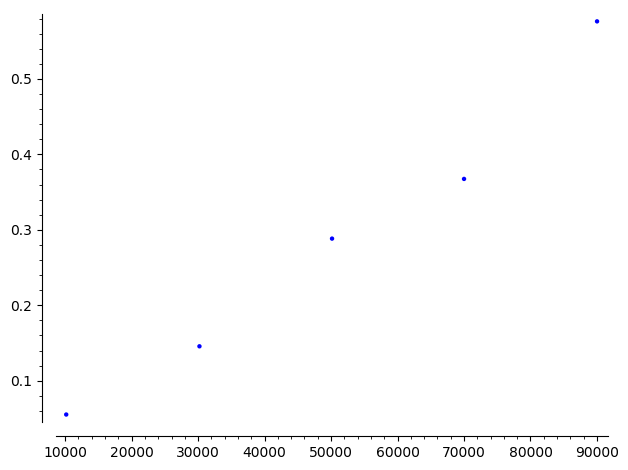

In [34]:
list_plot(data)

## 4. Working with really large primes

This has hopefully convinced you that in order to make the secret secure, we should make `p` large. In real-life applications, Diffie-Hellman key exchanges use large primes like the ones listed in this standard: http://datatracker.ietf.org/doc/rfc3526/

The document lists several primes which can be used. They are given in hexadecimal (i.e. base-16), but we can easily convert those to decimal -- for example, the smallest prime listed in that document is:

In [35]:
s = "FFFFFFFFFFFFFFFFC90FDAA22168C234C4C6628B80DC1CD129024E088A67CC74020BBEA63B139B22514A08798E3404DDEF9519B3CD3A431B302B0A6DF25F14374FE1356D6D51C245E485B576625E7EC6F44C42E9A637ED6B0BFF5CB6F406B7EDEE386BFB5A899FA5AE9F24117C4B1FE649286651ECE45B3DC2007CB8A163BF0598DA48361C55D39A69163FA8FD24CF5F83655D23DCA3AD961C62F356208552BB9ED529077096966D670C354E4ABC9804F1746C08CA237327FFFFFFFFFFFFFFFF"
p1 = int(s,16)
p1

2410312426921032588552076022197566074856950548502459942654116941958108831682612228890093858261341614673227141477904012196503648957050582631942730706805009223062734745341073406696246014589361659774041027169249453200378729434170325843778659198143763193776859869524088940195577346119843545301547043747207749969763750084308926339295559968882457872412993810129130294592999947926365264059284647209730384947211681434464714438488520940127459844288859336526896320919633919L

That's big!

We can compute a small example:

In [36]:
a = 2020
A = mod(2, p1)^a
A

476255751805024382658668027831353247136601799856444533012142031299555358294341354824003805650371512958197169403918917634133341122414794396789324703963868955122718691326514378138778758685738207873756546643218642842895536614432868783088233372010360726682601471619424443361469683028154027303576307129947486482843586467992610970683007693289434949092664977177338032179777468803300302663900070717372957421832789356784260432062197286944808402798493366544366403275914125

Or a bigger example:

In [37]:
a = 202020202020
A = mod(2, p1)^a
A

495805851909892758328228376374807613720595704925295457005433226802325195988684782569896177608878555888101465852528082783448725296517378669162730617275927603660483248141542005664289601597282620965462686251912044173257526724628924753261748148105630145920907785109246073784160586494651231004136457890061082015368501698583257273733771703408333652536850213117154932396967900953272719527925403491379004569239961264322287447635643714547692270538382190942348809292966879

Note that the order of moves is important here. If instead we had written `A = mod(2^a, p1)` then Sage would have tried to calculate $2^{202020202020}$ first as an integer, _then_ determine what that is mod `p1` -- but that integer is so big that it goes beyond the system's capacity and causes an error.

To complete the example, Bob finds:

In [38]:
b = randint(2, 10^10)
B = mod(2, p1)^b
B

405054314473496968893254533537408247129648095062263548745348586459341899592866886661434128482201159293740907167622359673570289123220274898089542326128862069663045226686805042318152822605623882480686894252390637303279153060849110798971301569038716677288416807675218637905619893353132376074163508073600687741351188290610035288107921108428450600403740738105358336423155666153737714597020535589442938053513516259551490431028536786158859631059211489730503685893128414

This gives the secret value:

In [39]:
B^a

947631858851391169531796801806351637529809283859644478658096030611467417908877955635415708950447980109365473403673445240484240838722702165422973849819190250226811527498420164980666155985099829915071278403461920759481776234533931531198277293525331150032090341379429052294469489058639729413850441330715316821384031723038954330939391422629654616406435485523527632077793627248631260812326239165339234560442754808419288526190924104431960265335916780337098992117962653

which agrees with what Bob would get too:

In [40]:
print(A^b)
A^b == B^a

947631858851391169531796801806351637529809283859644478658096030611467417908877955635415708950447980109365473403673445240484240838722702165422973849819190250226811527498420164980666155985099829915071278403461920759481776234533931531198277293525331150032090341379429052294469489058639729413850441330715316821384031723038954330939391422629654616406435485523527632077793627248631260812326239165339234560442754808419288526190924104431960265335916780337098992117962653


True

Notice that we are working out really large powers here, and the answers are being returned very quickly. To compute these high powers efficiently, Sage uses an algorithm for [exponentiation by squaring](https://en.wikipedia.org/wiki/Exponentiation_by_squaring).

The Wikipedia article gives some pseudocode (i.e. rough code that humans can read, but is not in any particular programming language) for a recursive function to do this:

```
  Function exp_by_squaring(x, n)
    if n < 0  then return exp_by_squaring(1 / x, -n);
    else if n = 0  then return  1;
    else if n = 1  then return  x ;
    else if n is even  then return exp_by_squaring(x * x,  n / 2);
    else if n is odd  then return x * exp_by_squaring(x * x, (n - 1) / 2);
```

So for instance, if I want to work out $x^4$ I will end up in the `n is even` case, which gives the answer as $(x^2)^2$ -- I need to use the function again to work out $x^2$, and this process will continue until eventually one of the "base cases" `n=0` or `n=1` are reached.

<div class="alert alert-info">
    <h3>Exercise 4.1</h3>

Use the pseudocode above to write a function `exp_by_squaring(x, n, p)` that computes $x^n \mod p$.

Remember that the above is only pseudocode, so you will need to make adjustments so that it is valid Sage code. You will also need to add in code to make sure calculations are being carried out $\text{mod } p$.
</div>

In [41]:
def exp_by_squaring(x, n, p):
    if n < 0:
        return mod(exp_by_squaring(1/x,-n,p),p)
    elif n == 0:
        return  1
    elif n == 1:
        return  mod(x,p)
    elif n%2==0:
        return mod(exp_by_squaring(x*x, n/2,p),p)
    elif n%2!=0:
        return mod(x*exp_by_squaring(x*x, (n-1)/2, p),p)
    

Let's test out your function:

In [42]:
p = next_prime(14380)
n = 123456789
your_ans = exp_by_squaring(3, n, p)
sage_ans = mod(3, p)^n
(your_ans, sage_ans)

(4900, 4900)

Let's also investigate the running times when working out a really large power:

In [43]:
pwr = randint(10^10, 10^11)
pwr

25528813222

Rather than writing our own code to do the timing, we can just use the `%timeit` command to do a quick check of the running time for a snippet of code:

You should find that Sage gets the answer about 10 times quicker than our `exp_by_squaring` function.

## 5. Choosing $p$ and $g$ to be secure

The security of the Diffie-Hellman key exchange protocol relies on the fact that Eve has to solve a difficult problem in order to discover the secret.

As we have seen, using a large prime $p$ increases the difficulty of Eve's task, and this relationship is roughly linear (the plot produced earlier should look like points on a straight line, allowing for some experimental error).

But this relies on the fact that the $g$ we use is a **generator** of the whole group $\mathbf{F}_p^{\times}$ -- if $g$ only generates a subgroup of $\mathbf{F}_p^{\times}$ then Eve's task is made easier, as she will only have to check at most $|\langle g \rangle|$ possibilities (rather than $p-1$).

Let's look at an example:

In [44]:
p = 40009
g = 2
mod(g, p)^5001

1

So Eve needs to check no more than about 5000 possibilities to solve the problem, rather than about 40000.

Let's check the running time:

In [45]:
find_average_runtime(p, g)

0.02054450511932373

To see that this really is lower than we would have first thought, let's combine it with the data from earlier (see the end of section 3) where `data` was defined:

In [46]:
new_data = data + [[p, find_average_runtime(p, g)]]

In [47]:
new_data

[[10163, 0.055242514610290526],
 [30203, 0.14564781188964843],
 [50147, 0.2883544683456421],
 [70003, 0.3674426794052124],
 [90011, 0.5762285947799682],
 [40009, 0.04081451892852783]]

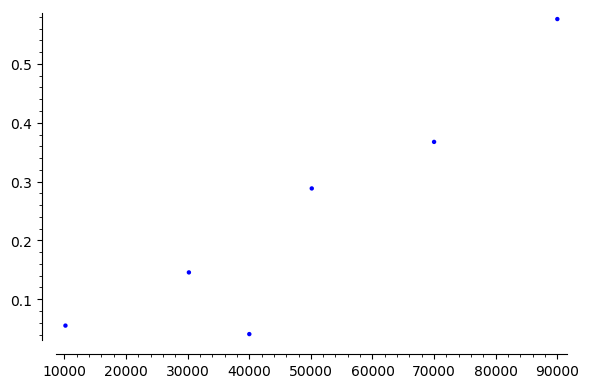

In [48]:
list_plot(new_data)

<div class="alert alert-info">
    <h3>Exercise 5.1</h3>

The prime 120247 is an even worse example!

(a) Check that in $\mathbf{F}_{120247}^\times$ the element 2 has order 1227.

(b) Update `new_data` with the results for this $p$, and produce the plot again.
</div>

In [52]:
p = 120247
g = 2
mod(g, p)^1227

1

In [53]:
new_data.append([120247,find_average_runtime(120247, 2)])

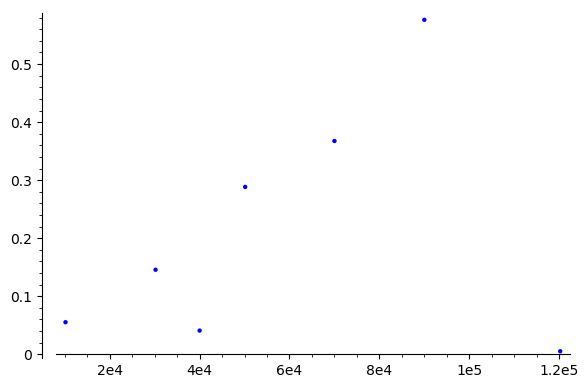

In [54]:
list_plot(new_data)

So if we want to use 2 as the base (i.e. as $g$), we need to ensure that it is a generator of $\mathbf{F}_{p}^\times$
Here is one way to work out the order of 2 in $\mathbf{F}_{p}^\times$

In [55]:
p = 120247
gpwr = mod(1, p)
for i in range(1,p):
    gpwr = gpwr*2
    if(gpwr == 1):
        print("order of 2 is "+str(i))
        break

order of 2 is 1227


<div class="alert alert-info">
    <h3>Exercise 5.2</h3>

Using the method from the code above, write a procedure `find_order_of` which takes in an integer `g` and a prime `p`, and returns the order of `g` in $\mathbf{F}_{p}^\times$.

Check your code against these facts:
* $3^{34} \equiv 1 \mod 307$
* $7^{210} \equiv 1 \mod 211$
* $3^{125} \equiv 1 \mod 251$
</div>

In [120]:
def find_order_of(g,p):
    gpwr = mod(1, p)
    for i in range(1,p):
        gpwr = gpwr*g
        print(gpwr)
        if(gpwr == 1):
            return i

In [123]:
find_order_of(5,17)

5
8
6
13
14
2
10
16
12
9
11
4
3
15
7
1


16

In [102]:
gpwr = mod(1, 7)
gpwr*3

16677181699666569

<div class="alert alert-info">
    <h3>Exercise 5.3</h3>

The following code generates a list of primes between 1000 and 2000:

```
p = next_prime(1000)
primes = []
while p <= 2000:
    primes.append(p)
    p = next_prime(p)
primes
```

Produce a list `genby2` of the primes between 1000 and 2000 for which $\mathbf{F}_{p}^\times$ is generated by 2.
</div>

In practice, the primes used in Diffie-Hellman are ["safe primes"](https://en.wikipedia.org/wiki/Safe_prime) which are of the form $p = 2q+1$ where $q$ is also prime.

This is so that the cyclic group $\mathbf{F}_{p}^\times$ has order $2q$ - thus by Lagrange's theorem, the only proper subgroups have size $2$ or $q$. The fact that $q$ is a large prime means that it is still difficult to solve the discrete logarithm problem.